# Assignment 3 - Supervised Learning

## *Malvika Marathe*
Netid:  *mm742*

## 1
### [40 points] From theory to practice: classification through logistic regression

#### Introduction
For this problem you will derive, implement through gradient descent, and test the performance of a logistic regression classifier for a binary classification problem.

In this case, we'll assume our logistic regression problem will be applied to a two dimensional feature space. Our logistic regression model is:

$$f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

where the sigmoid function is defined as $\sigma(x) = \frac{e^x}{1+e^{x}}= \frac{1}{1+e^{-x}}$. Also, since this is a two-dimensional problem, we define $\mathbf{w}^T \mathbf{x}_i = w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}$ and here, $x_{i,0} \triangleq 1$

As in class, we will interpret the response of the logistic regression classifier to be the likelihood of the data given the model. For one sample, $(y_i, \mathbf{x_i})$, this is given as:

$$P(Y=y_i|X=x_i) = f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

#### Find the cost function that we can use to choose the model parameters, $\mathbf{w}$, that best fit the training data.

**(a)** What is the likelihood function of the data that we will wish to maximize?

**(b)** Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express part (a) as a cost function of the model parameters, $C(\mathbf{w})$, that is the negative of the logarithm of (a).

**(c)** Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial derivatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\frac{\partial C}{\partial w_0}, \frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2}\right]$.

**(d)** Write out the gradient descent update equation, assuming $\eta$ represents the learning rate.

#### Prepare and plot your data

**(e)** Load the data and scatter plot the data by class. In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.  Comment on the data: do the data appear separable? Why might logistic regression be a good choice for these data or not?

**(f)** Do the data require any preprocessing due to missing values, scale differences, etc? If so, how did you remediate this?

#### Implement gradient descent and your logistic regression algorithm

**(g)** Create a function or class to implement your logistic regression. It should take as inputs the model parameters, $\mathbf{w}=\left[w_0,w_1,w_2\right]$, and output the class confidence probabilities, $P(Y=y_i|X=x_i)$.

**(h)** Create a function that computes the cost function $C(\mathbf{w})$ for a given dataset and corresponding class labels.

**(i)** Create a function or class to run gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration (or "epoch") of the algorithm. Divide your data into a training and testing set where the test set accounts for 30 percent of the data and the training set the remaining 70 percent. In doing this we'll need to make some assumptions / experiment with the following:
1. The initialization of the algorithm - what should you initialize the model parameters to? For this, randomly initialize the weights to a different values between 0 and 1.
2. The learning rate - how slow/fast should the algorithm proceed in the direction opposite the gradient? This you will experiment with.
3. Stopping criteria - when should the algorithm be finished searching for the optimum? Set this to be when the cost function changes by no more than $10^{-6}$ between iterations. Since we have a weight vector, you can compute this by seeing if the L2 norm of the weight vector changes by no more than $10^{-6}$ between iterations.

**(j)** At each step in the gradient descent algorithm it will produce updated parameter estimates. For each set of estimates, calculate the cost function for both the training and the test data. 

**(k)** Show this process for different learning rates by plotting the resulting cost as a function of iteration (or "epoch"). What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why? Use the parameter you choose here for the learning rate for the remainder of this question.

#### Test your model performance through cross validation

**(l)** Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package [StratifiedKFolds](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) may be helpful). Produce Receiver Operating Characteristic Curves (ROC curves) of your cross validated performance. 

**(m)** Why do we use cross validation?

**(n)** Make two plots - one of your training data, and one for your test data - with the data scatterplotted and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?

**(o)** Compare your trained model to random guessing. Show the ROC curve for your model and plot the chance diagonal. What area under the curve (AUC) does your model achieve? How does your model compare in terms of performance?

**ANSWER**

**(a)**
$$
  L(x) = \prod_{i = 1}^{n} \bigg(\frac{1}{1+e^{-wx_i}}\bigg)^{y_i}\bigg(\frac{e^{-wx_i}}{1+e^{-wx_i}}\bigg)^{(1-y_i)}
$$

**(b)**
$$
   ln(L(x)) = -\sum_{i = 1}^{N} y_i ln \bigg(\frac{1}{1+e^{-wx_i}}\bigg) + (1-y_i)ln \bigg(\frac{e^{-wx_i}}{1+e^{-wx_i}}\bigg)
$$

$$
    ln(L(x)) = -\sum_{i = 1}^{N} y_i \big[ln(1) - log(1 + e^{-wx_i} \big] + (1 - y_i) \big[ln(e^{-wx_i}) - log(1 + e^{-wx_i})\big]
$$

$$
    ln(L(x)) = -\sum_{i = 1}^{N} -y_i ln(1 + e^{-wx_i}) + \big[ln(e^{-wx_i}) - ln(1 + e^{-wx_i}) - y_iln(e^{-wx_i}) + y_ilog(1 + e^{-wx_i}) \big]
$$

$$
    ln(L(x)) = -\sum_{i = 1}^{N} ln(e^{-wx_i}) - ln(1 + e^{-wx_i}) -y_iln(e^{-wx_i})
$$

$$
    ln(L(x)) = -\sum_{i = 1}^{N} ln(e^{-wx_i})[1-y_i] - ln(1 + e^{-wx_i})
$$

$$
    ln(L(x)) = -\sum_{i = 1}^{N} -wx_i(1-y_i) - ln(1 + e^{-wx_i})
$$

$$
    c(W) = ln(L(x)) = \sum_{i = 1}^{N} + wx_i(1-y_i) + ln(1 + e^{-wx_i})
$$


**(c)**

$$
    ln(L(x))' = x_i(1-y_i) + \frac{1}{1 + e^{-wx_i}} \bullet e^{-wx_i} \bullet -x_i
$$

$$
    ln(L(x))' = x_i(1 - y_i) - \frac{x_ie^{-wx_i}}{1 + e^{-wx_i}}
$$

$$
    ln(L(x))' = x_i\big((1-y_i) - \frac{e^{-wx_i}}{1 + e^{-wx_i}}\big)
$$


**Partial Derivatives:**

$$
    \frac{\partial C(w)}{\partial w_0} = x_0\big((1-y) - \frac{e^{-wx_0}}{1 + e^{-wx_0}}\big)
$$
$$
    \frac{\partial C(w)}{\partial w_1} = x_1\big((1-y) - \frac{e^{-wx_1}}{1 + e^{-wx_1}}\big)
$$
$$
    \frac{\partial C(w)}{\partial w_2} = x_2\big((1-y) - \frac{e^{-wx_2}}{1 + e^{-wx_2}}\big)
$$

**(d)**
Gradient Descent

$$
    w^{i+1} = w^i - \eta\frac{\partial C(w)}{\partial w}
$$

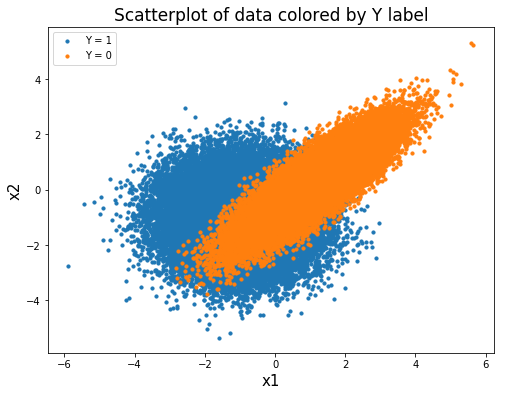

In [26]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# (e) Scatter plot of the data
data = pd.read_csv('data/A3_Q1_data.csv')

# # x = feature values, all the columns except the last column
x = data[['x1', 'x2']].values 

# y = target values, last column of the data frame
y = data['y'].values
y_0 = data.loc[y == 0]
y_1 = data.loc[y == 1]

# plots
fig = plt.figure(figsize=(8,6))
plt.scatter(y_1.iloc[:, 0], y_1.iloc[:, 1], s=10, label='Y = 1')
plt.scatter(y_0.iloc[:, 0], y_0.iloc[:, 1], s=10, label='Y = 0')
plt.legend()
plt.xlabel("x1", size = 15)
plt.ylabel("x2", size = 15)
plt.title("Scatterplot of data colored by Y label", size = 17)
plt.show()

In [27]:
#(f)
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
x1    100000 non-null float64
x2    100000 non-null float64
y     100000 non-null float64
dtypes: float64(3)
memory usage: 2.3 MB


,x1,x2,y
count,100000.000000,100000.000000,100000.000000
mean,0.048529,-0.397106,0.500000
std,1.452409,1.164015,0.500003
min,-5.886436,-5.352265,0.000000
25%,-1.041007,-1.206343,0.000000
50%,0.039551,-0.401099,0.500000
75%,1.143536,0.402899,1.000000
max,5.634476,5.317718,1.000000


There are no missing values, and there does not seem to be an issue with scaling. 

**(f)** Since the labels are binary, logistic regression is a good option for classification. Unfortunately, the data does not seem to be easily seperable, since there is quite a bit of overlap between -2 and 2 on the x-axis and -4 and 2 on the y axis. Hopefully, with logistic regression, the sigmoid curve will be able to seperate the two classes and overcome the overlap.

In [28]:
# (g)(h)(i)(j)
from math import e
import numpy as np

class LogisticRegression: #(g)
    
    def __init__(self):
        self.w = None
        self.change = None
        self.train_cost_history = []
        self.test_cost_history = []
        
    #input sigmoid function given    
    def sigmoid(self, x):
        return e**(x) / (1 + e**(x))
    
    #input cost function calculated (h)
    def cost(self, X, Y):
        value = len(Y)
        Y_hat = self.sigmoid(X.dot(self.w))
        cost_function = - Y.T.dot(np.log(Y_hat)) - (1-Y).T.dot(np.log(1- Y_hat))
        return cost_function / value
    
    #gradient function (i)
    def gradient(self, X, Y):
        Y_hat = self.sigmoid(X.dot(self.w))
        return (1/len(Y)) * X.T.dot(Y_hat - Y)
    
    def fit(self, x_train, y_train, x_test, y_test, learning_rate, FOI=6000, history = True):
        # initialize weight
        self.w = np.random.rand(x_train.shape[1])
        
        #run gradient descent to minimize cost
        self.change = 0
        while self.change <= FOI:
            current_w = self.w
            
            # cost
            cost_train = self.cost(X=x_train, Y=y_train)
            cost_test = self.cost(X=x_test, Y=y_test)
            self.train_cost_history.append(cost_train)
            self.test_cost_history.append(cost_test)
            
            if (self.change + 1) % 500 == 0 and history:
                cost_train = round(cost_train, 4)
                cost_test = round(cost_test, 4)
                print("FOI = {}, train cost = {} , test cost = {}".format(self.change + 1, cost_train, cost_test))
                pass
            
            # training
            y_hat = self.sigmoid(x_train.dot(self.w))
            gradient = self.gradient(x_train, y_train)
            self.w = current_w - learning_rate * gradient
            
            self.change = self.change + 1
            if self.change != 0 and np.abs(np.linalg.norm(self.w, ord=2) - np.linalg.norm(current_w, ord=2)) < 1e-06:
                break
            pass
        print("DONE!")
        pass
    
    def predict(self, x):
        return self.sigmoid(x.dot(self.w))
    

In [29]:
# divide data into testing and training
mix = np.arange(len(y))
np.random.shuffle(mix)

x_train = x[:50000]
y_train = y[:50000]

x_test = x[50000:]
y_test = y[50000:]

x_train = (x_train - x_train.mean(axis=0)) / x_train.std(axis=0)
x_test = (x_test - x_test.mean(axis=0)) / x_test.std(axis=0)

In [30]:
# (j) produce updated parameter estimates
lg = LogisticRegression()
lg.fit(x_train = x_train, y_train = y_train, x_test = x_test, y_test = y_test, learning_rate = 0.1)

FOI = 500, train cost = 0.3287 , test cost = 0.3316
FOI = 1000, train cost = 0.3266 , test cost = 0.3296
FOI = 1500, train cost = 0.3265 , test cost = 0.3295
FOI = 2000, train cost = 0.3265 , test cost = 0.3295
FOI = 2500, train cost = 0.3265 , test cost = 0.3295
FOI = 3000, train cost = 0.3265 , test cost = 0.3295
DONE!


DONE!
DONE!
DONE!
DONE!
DONE!
DONE!
DONE!
DONE!
DONE!


Text(0.5, 1.0, 'Test Function')

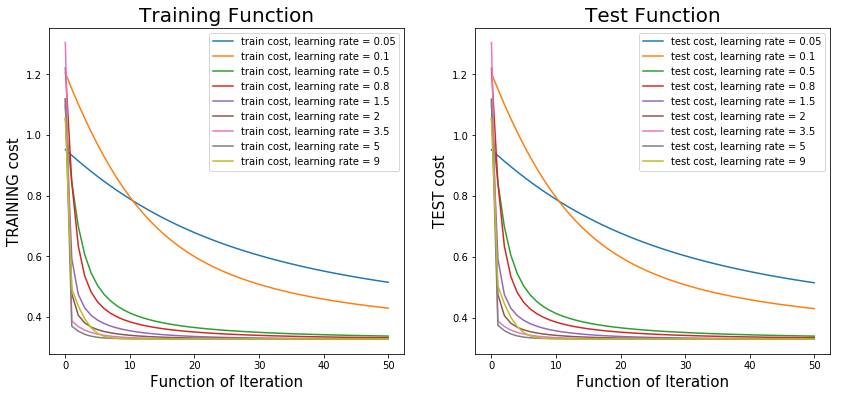

In [31]:
# (k) Show process for different learning rates
figure, (train, test) = plt.subplots(1, 2, figsize=(14, 6))
learning_rates = [0.05, 0.1, 0.5, 0.8, 1.5, 2, 3.5, 5, 9]

FOI = 50
for learning_rate in learning_rates:
    logreg_learning_rate = LogisticRegression()
    logreg_learning_rate.fit(x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test, 
                             learning_rate = learning_rate, FOI=FOI, history=False)
    
    train.plot(range(logreg_learning_rate.change), 
               logreg_learning_rate.train_cost_history, 
               label = "train cost, learning rate = {}".format(learning_rate))
    test.plot(range(logreg_learning_rate.change), 
              logreg_learning_rate.test_cost_history, 
              label = "test cost, learning rate = {}".format(learning_rate))

#plot the function of iteration for test and train
train.legend()
train.set_xlabel("Function of Iteration", size = 15)
train.set_ylabel("TRAINING cost", size = 15)
train.set_title("Training Function", size = 20)

test.legend()
test.set_xlabel("Function of Iteration", size = 15)
test.set_ylabel("TEST cost", size = 15)
test.set_title("Test Function", size = 20)

**(k) What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why? Use the parameter you choose here for the learning rate for the remainder of this question.**

As the both the training and test learning rates decrease, the rate at which the cost decreases as the epoch increases becomes faster. When the learning rate is low, the cost decreases at a relatively low rate. But when the learning rate it high, the cost drops very fast, right at the initial epochs. This is because the learning rate controls the weight of the of the network with respect to the gradient descent. It affects how quickly our model can converge to a local minima or arrive at the best accuracy. 

DONE!
DONE!
DONE!
DONE!
DONE!


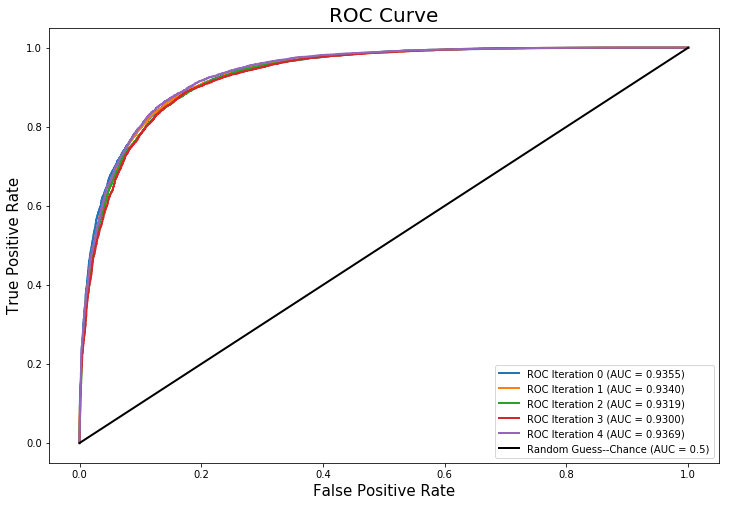

In [32]:
# (l) cross-validation
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
from scipy import interp

skf = StratifiedKFold(n_splits=5) #5 fold cross validation
i = 0
True_Positive_Rate_Array = []
AUC_Curve = []
False_Pos_mean = np.linspace(0, 1, 100)
plt.figure(figsize=(12, 8))

# partition the training data into training and validation set
for train_index, val_index in skf.split(x, y):
    x_train, x_value = x[train_index], x[val_index]
    y_train, y_value = y[train_index], y[val_index]
    
    x_train = (x_train - x_train.mean(axis=0)) / x_train.std(axis=0)
    x_value = (x_value - x_value.mean(axis=0)) / x_value.std(axis=0)
    
    cross_val = LogisticRegression()
    cross_val.fit(x_train=x_train, y_train=y_train, x_test=x_value, 
                  y_test=y_value, learning_rate = 5, history = False)
    
    y_value_hat = cross_val.predict(x_value)
    False_Positive_Rate, True_Positive_Rate, thresholds = roc_curve(y_value, y_value_hat)
    ROC = auc(False_Positive_Rate, True_Positive_Rate)
    
    True_Positive_Rate_Array.append(interp(False_Pos_mean, False_Positive_Rate, True_Positive_Rate))
    True_Positive_Rate_Array[-1][0] = 0.0
    ROC = auc(False_Positive_Rate, True_Positive_Rate)
    AUC_Curve.append(ROC)
    
    plt.plot(False_Positive_Rate, True_Positive_Rate, lw=2, label='ROC Iteration %d (AUC = %0.4f)' % (i, ROC))
    i += 1
    pass

#(o)
plt.plot([0, 1], [0, 1], lw=2, color='black', label='Random Guess--Chance (AUC = 0.5)', alpha=1)


plt.xlabel('False Positive Rate', size = 15)
plt.ylabel('True Positive Rate', size = 15)
plt.title('ROC Curve', size = 20)
plt.legend(loc="lower right")
plt.show()

**(m)**
There are several reasons why you should use cross validation. First, you are able to train and test with all of your data. Second, the more folds you use in the your cross validation, the more measuremnts you can have that report your model's accuracy. The true error will be estimated using the average error rate which is better than one or two error rates from splitting the data into a training and testing set once. 

/Users/Malvika/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


DONE!


Text(0, 0.5, 'X2')

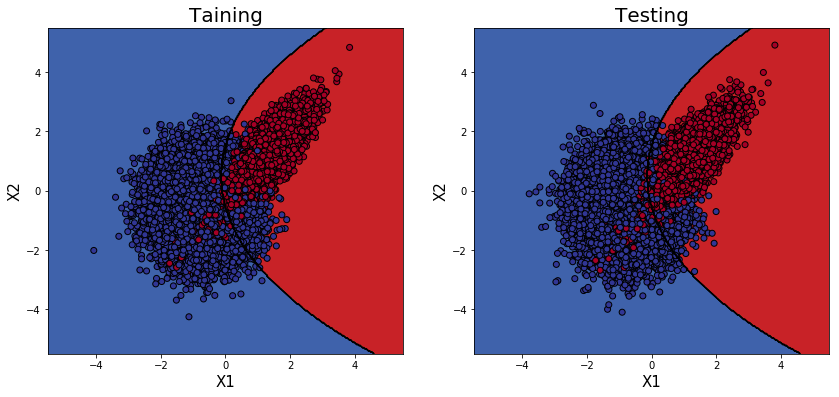

In [33]:
#(n) plot decision boundary
%matplotlib inline
import matplotlib.pyplot as plt

# divide data randomly
shuffle = np.arange(len(y))
np.random.shuffle(shuffle)

x_train = x[:50000]
y_train = y[:50000]

x_test = x[50000:]
y_test = y[50000:]

# normalize training and test data
x_train = (x_train - x_train.mean(axis=0)) / x_train.std(axis=0)
x_test = (x_test - x_test.mean(axis=0)) / x_test.std(axis=0)

# bias
x_train = np.column_stack((np.ones(len(x_train)),
                          x_train,
                          x_train**2))
x_test = np.column_stack((np.ones(len(x_test)),
                          x_test,
                          x_test**2))

# plot background
x_1 = np.linspace(-5.5, 5.5, 300)
x_2 = np.linspace(-5.5, 5.5, 300)

x_1_mesh, x_2_mesh = np.meshgrid(x_1, x_2)
X_mesh = np.column_stack((np.ones(len(x_1_mesh.ravel())),
                          x_1_mesh.ravel(),
                          x_2_mesh.ravel(),
                          x_1_mesh.ravel()**2, 
                          x_2_mesh.ravel()**2))

# Make model
logreg = LogisticRegression()
logreg.fit(x_train = x_train, y_train = y_train, x_test = x_test, y_test = y_test, learning_rate = 5)

y_hat_mesh = np.where(logreg.predict(X_mesh) > 0.5, 1, 0)
y_hat = np.where(logreg.predict(x_train) > 0.5, 1, 0)
y_hat_test = np.where(logreg.predict(x_test) > 0.5, 1, 0)


figure, (plot_1, plot_2) = plt.subplots(1, 2, figsize=(14, 6))
plot_1.contourf(x_1_mesh, x_2_mesh, y_hat_mesh.reshape(x_1_mesh.shape), cmap="RdYlBu")
plot_1.contour(x_1_mesh, x_2_mesh, y_hat_mesh.reshape(x_1_mesh.shape), colors = "black", linewidths=0.8)
plot_1.scatter(x = x_train[:,1], y = x_train[:,2], c=y_train, cmap="RdYlBu", edgecolors="black")
plot_1.set_xlim(x_1_mesh.min(), x_1_mesh.max())
plot_1.set_ylim(x_2_mesh.min(), x_2_mesh.max())
plot_1.set_title("Taining", size = 20)
plot_1.set_xlabel("X1", size = 15)
plot_1.set_ylabel("X2", size = 15)

plot_2.contourf(x_1_mesh, x_2_mesh, y_hat_mesh.reshape(x_1_mesh.shape), cmap="RdYlBu")
plot_2.contour(x_1_mesh, x_2_mesh, y_hat_mesh.reshape(x_1_mesh.shape), colors = "black", linewidths=0.8)
plot_2.scatter(x = x_test[:,1], y = x_test[:,2], c=y_test, cmap="RdYlBu", edgecolors="black")
plot_2.set_xlim(x_1_mesh.min(), x_1_mesh.max())
plot_2.set_ylim(x_2_mesh.min(), x_2_mesh.max())
plot_2.set_title("Testing", size = 20)
plot_2.set_xlabel("X1", size = 15)
plot_2.set_ylabel("X2", size = 15)
#figure.show()

**(o)**
Plot shown above in part (l), black line shows the random guess comparison. The best area under the curve acheived by the model was 0.9355. This compares to a random guess AUC of 0.5. The model has 0.4355 larger area which indicates a higher accuracy due to a higher number of true positives and lower number of false positives overall.

## 2

### [20 points] Digits classification

**(a)** Construct your dataset from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Your goal is to determine whether or not an example is a 3, therefore your binary classifier will seek to estimate $y=1$ if the digit is a 3, and $y=0$ otherwise. Create your dataset by transforming your labels into a binary format. 

**(b)** Plot 10 examples of each class 0 and 1, from the training dataset.

**(c)** How many examples are present in each class? Are the classes balanced? What issues might this cause? (OVERFITTING)

**(d)** Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the class, and (2) a classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. Describe the algorithm's performance and explain any discrepancies you find.

**(f)** Using a logistic regression classifier (a linear classifier), apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module (DO NOT use your function from question 1) and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3) $F_1$-score, and (4) area under the curve (AUC). Describe the implications of your findings.

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import random as rand
from sklearn.metrics import mean_squared_error, roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.dummy import DummyClassifier
from mlxtend.data import loadlocal_mnist

# (a) import data and re-label

X_train, y_train = loadlocal_mnist(
       images_path='/Users/Malvika/MNIST/train-images-idx3-ubyte',
       labels_path='/Users/Malvika/MNIST/train-labels-idx1-ubyte')

X_test, y_test = loadlocal_mnist(
       images_path='/Users/Malvika/MNIST/t10k-images-idx3-ubyte',
       labels_path='/Users/Malvika/MNIST/t10k-labels-idx1-ubyte')

x_train = np.reshape(X_train, (60000,28,28))
x_test = np.reshape(X_test, (10000,28,28))

# Re-label 3 or not
y_train = (y_train == 3)*1
y_test = (y_test == 3)*1

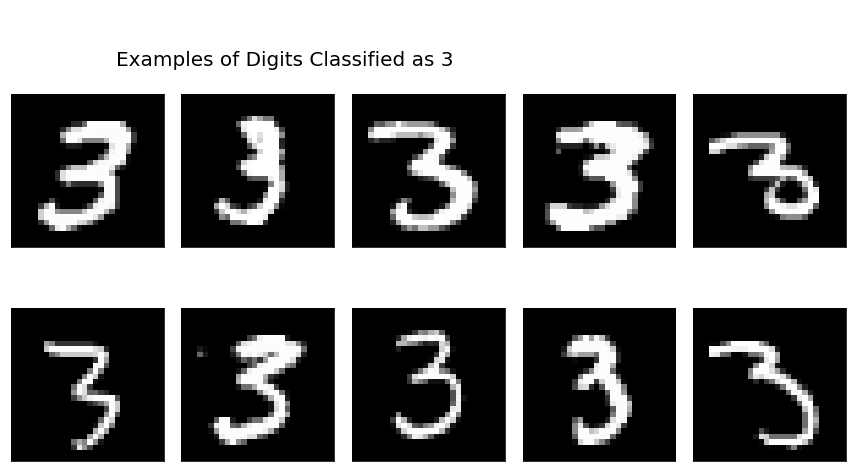

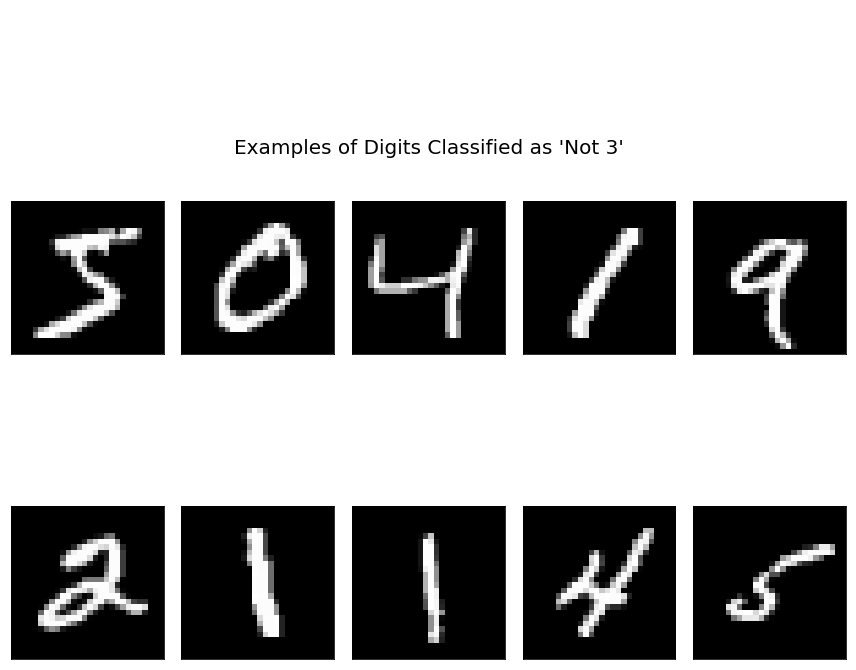

In [10]:
# (b)
# Create set of indexes for class 3 and Not3
train_3_index = np.where(y_train == 1)
train_not3_index = np.where(y_train == 0)

# Plot 10 examples of class 3

fig, axs = plt.subplots(2, 5)
fig.set_figwidth(8)
fig.set_figheight(8)

# For the first 10 class 3 images add them to the subplots
count = 0
for i in range(2):
    for j in range(5):
        image = x_train[train_3_index[0][count]]
        axs[i,j].imshow(image, cmap = 'gray')
        axs[i,j].set_xticks([], [])
        axs[i,j].set_yticks([], [])
        count += 1
        pass
    pass
plt.tight_layout(rect=[0, 0.03, 1.5, 0.99])
fig.suptitle('\n\nExamples of Digits Classified as 3',
            fontsize = 20)
plt.show()

# Plot 10 examples of class Not3
# Creating subplots
fig, axs = plt.subplots(2, 5)
fig.set_figwidth(12)
fig.set_figheight(12)

# For the first 10 class Not3 images add them to the subplots
count = 0
for i in range(2):
    for j in range(5):
        image = x_train[train_not3_index[0][count]]
        axs[i,j].imshow(image, cmap = 'gray')
        axs[i,j].set_xticks([], [])
        axs[i,j].set_yticks([], [])
        count += 1
        pass
    pass
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle('\n\n\n\n\n\nExamples of Digits Classified as \'Not 3\'',
            fontsize = 20)
plt.show()

In [11]:
# (c) How big is each class

print('Total training datasize =  ', len(y_train))
print('\nNumber of class 3 observations= ', sum(y_train)), 
print('Percentage of class 3 observations = ', round(sum(y_train)/len(y_train)*100,1), '%')

print('\nNumber of non-class 3 observations= ', len(y_train) - sum(y_train)), 
print('Percentage of NON-class 3 observations = ', round((1-sum(y_train)/len(y_train))*100,1), '%')

Total training datasize =   60000

Number of class 3 observations=  6131
Percentage of class 3 observations =  10.2 %

Number of non-class 3 observations=  53869
Percentage of NON-class 3 observations =  89.8 %


The classes are unbalanced. This will create an inaccurate prediction of the images that are class 3 since there are many more of these images. Moreover, the images that are class 3 will have an extremeley high accuracy. The data will be overfitted.

/Users/Malvika/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Fold 0 completed.


/Users/Malvika/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Fold 1 completed.


/Users/Malvika/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Fold 2 completed.


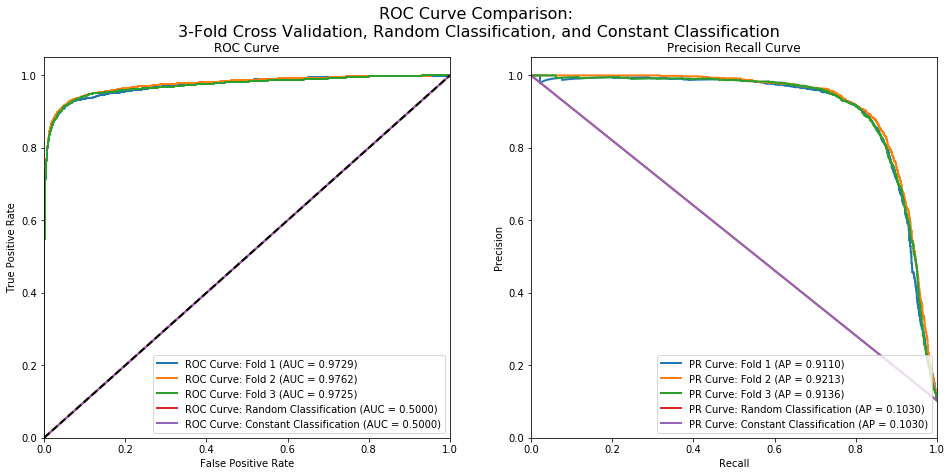

In [12]:
# (d)
fig, plot = plt.subplots(1,2)
fig.set_figwidth(16)
fig.set_figheight(7)

# Cross validation
Cross_Validation = StratifiedKFold(n_splits = 3)
# Loop through each fold
i = 0
for train, test in Cross_Validation.split(X_train, y_train):
    # Fit logistic model on told
    lg = LogisticRegression(solver='lbfgs')
    fit = lg.fit(X_train[train], y_train[train])
    # Calculate probablities of for each class
    y_probs = fit.predict_proba(X_train[test])
   
    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_train[test], y_probs[:, 1])
    ROC_AUC = auc(fpr, tpr)
    plot[0].plot(fpr, tpr, lw=2, alpha=1,
             label='ROC Curve: Fold {0} (AUC = {1:0.4f})'.format(i+1, ROC_AUC))
    print('Fold {} completed.'.format(i))
    
    # PR Curve
    precision, recall, thresholds = precision_recall_curve(y_train[test], y_probs[:, 1])
    average_precision = average_precision_score(y_train[test], y_probs[:, 1])
    plot[1].plot(recall, precision, lw = 2,
       label='PR Curve: Fold {0} (AP = {1:0.4f})'.format(i+1, average_precision))
    
    i += 1
    pass

# Random Classifier
# Fit random classifier
Dummy_Classifier = DummyClassifier(strategy = 'uniform')
fit = Dummy_Classifier.fit(X_train[:50000,:], y_train[:50000])
y_probs = fit.predict_proba(X_train[50000:,:])

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_train[50000:], y_probs[:, 1])
ROC_AUC = auc(fpr, tpr)
plot[0].plot(fpr, tpr, lw=2, alpha=1,
   label='ROC Curve: Random Classification (AUC = {0:0.4f})'.format(ROC_AUC))
# PR Curve
precision, recall, thresholds = precision_recall_curve(y_train[50000:], y_probs[:, 1])
average_precision = average_precision_score(y_train[50000:], y_probs[:, 1])
plot[1].plot(recall, precision, lw = 2,
   label='PR Curve: Random Classification (AP = {0:0.4f})'.format(average_precision))

# Constant 0 (Not3) Classifier
# Fit constant classifier
Dummy_Classifier = DummyClassifier(strategy = 'constant', constant = 0)
fit = Dummy_Classifier.fit(X_train[:50000,:], y_train[:50000])
y_probs = fit.predict_proba(X_train[50000:,:])

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_train[50000:], y_probs[:, 1])
ROC_AUC = auc(fpr, tpr)
plot[0].plot(fpr, tpr, lw=2, alpha=1, 
   label='ROC Curve: Constant Classification (AUC = {0:0.4f})'.format(ROC_AUC))
# PR Curve
precision, recall, thresholds = precision_recall_curve(y_train[50000:], y_probs[:, 1])
average_precision = average_precision_score(y_train[50000:], y_probs[:, 1])
plot[1].plot(recall, precision, lw = 2,
   label='PR Curve: Constant Classification (AP = {0:0.4f})'.format(average_precision))


# Format ROC Plot
plot[0].plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plot[0].set_xlim([0.0, 1.0])
plot[0].set_ylim([0.0, 1.05])
plot[0].set_xlabel('False Positive Rate')
plot[0].set_ylabel('True Positive Rate')
plot[0].legend(loc="lower right")
plot[0].set_title('ROC Curve')

# Format PR Plot
plot[1].set_xlim([0.0, 1.0])
plot[1].set_ylim([0.0, 1.05])
plot[1].set_xlabel('Recall')
plot[1].set_ylabel('Precision')
plot[1].legend(loc="lower right")
plot[1].set_title('Precision Recall Curve')

# Add overall title
#plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.suptitle('ROC Curve Comparison:\n {0}-Fold Cross Validation,+
             'Random Classification, and Constant Classification'.format(i),
             fontsize = 16)
plt.show() 


**(d)**
The first fold ROC curve performed the best, with the highest AUC of 0.9729. The random classification and constant classification performed the same and both had an AUC of 0.5. In the precision-recall graph, the results were similar. The first fold performed the best. 

In [13]:
#(f) print parameters, f score, and AUC
cost_history = []
cost = []
F_scores = []
AUC_History = []
parameters = []

for i, c in enumerate(np.linspace(0.1,1, 10)): 
    
    c = round(c,1)
    cost_history.append(c)
    print(i,c)
    
    #fit model
    lg = LogisticRegression(penalty = 'l1', C = c, solver='saga')
    fit = lg.fit(X_train, y_train)
    y_probs = fit.predict_proba(X_test)
    y_preds = fit.predict(X_test)

    non_zero_coefs = sum(fit.coef_[0,] != 0)
    print('Non-zero parameters = {0}'.format(non_zero_coefs))
    parameters.append(non_zero_coefs)

    # F-score
    f_score = f1_score(y_test, y_preds)
    print('F-score = {0:0.4f}'.format(f_score))
    F_scores.append(f_score)

    # AUC
    fpr, tpr, thresholds = roc_curve(y_test[:,], y_probs[:, 1])
    roc_auc = auc(fpr, tpr)
    print('AUC = {0:0.4f}'.format(roc_auc))
    AUC_History.append(roc_auc)
    
    pass

0 0.1


/Users/Malvika/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Non-zero parameters = 623
F-score = 0.8813
AUC = 0.9799
1 0.2


/Users/Malvika/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Non-zero parameters = 636
F-score = 0.8808
AUC = 0.9799
2 0.3


/Users/Malvika/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Non-zero parameters = 643
F-score = 0.8808
AUC = 0.9799
3 0.4


/Users/Malvika/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Non-zero parameters = 648
F-score = 0.8808
AUC = 0.9799
4 0.5


/Users/Malvika/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Non-zero parameters = 650
F-score = 0.8808
AUC = 0.9799
5 0.6


/Users/Malvika/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Non-zero parameters = 653
F-score = 0.8808
AUC = 0.9799
6 0.7


/Users/Malvika/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Non-zero parameters = 657
F-score = 0.8808
AUC = 0.9799
7 0.8


/Users/Malvika/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Non-zero parameters = 659
F-score = 0.8808
AUC = 0.9799
8 0.9


/Users/Malvika/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Non-zero parameters = 662
F-score = 0.8808
AUC = 0.9799
9 1.0
Non-zero parameters = 663
F-score = 0.8808
AUC = 0.9799


/Users/Malvika/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


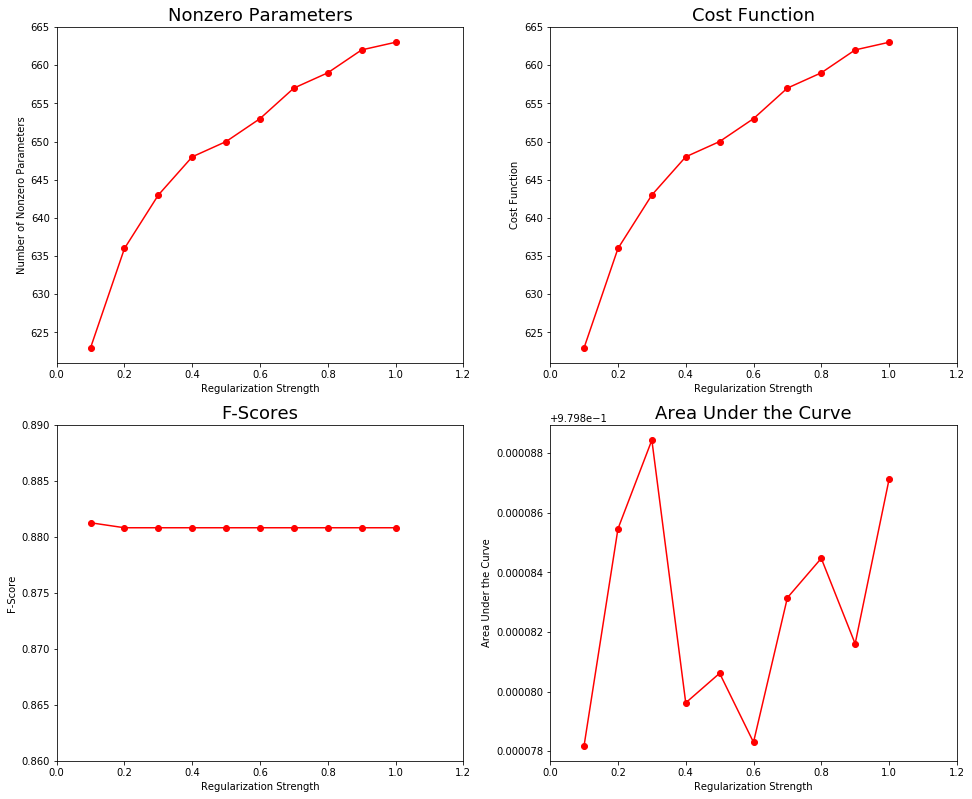

In [14]:
# (f) plot the lasso output
fig, axs = plt.subplots(2,2)
fig.set_figwidth(8)
fig.set_figheight(8)

axs[0,0].plot(cost_history, parameters, '-o', color = 'red')
axs[0,0].set_title('Nonzero Parameters', size = 18)
axs[0,0].set_xlim([0, 1.2])
axs[0,0].set_xlabel('Regularization Strength')
axs[0,0].set_ylabel('Number of Nonzero Parameters')

axs[0,1].plot(cost_history, parameters, '-o', color = 'red')
axs[0,1].set_title('Cost Function', size = 18)
axs[0,1].set_xlim([0, 1.2])
axs[0,1].set_xlabel('Regularization Strength')
axs[0,1].set_ylabel('Cost Function')

axs[1,0].plot(cost_history, F_scores, '-o', color = 'red')
axs[1,0].set_title('F-Scores', size = 18)
axs[1,0].set_xlim([0, 1.2])
axs[1,0].set_ylim([0.86, .89])
axs[1,0].set_xlabel('Regularization Strength')
axs[1,0].set_ylabel('F-Score')

axs[1,1].plot(cost_history, AUC_History, '-o', color = 'red')
axs[1,1].set_title('Area Under the Curve', size = 18)
axs[1,1].set_xlim([0, 1.2])
axs[1,1].set_xlabel('Regularization Strength')
axs[1,1].set_ylabel('Area Under the Curve')

# Add overall title
plt.tight_layout(rect=[-1, -1, 0.7, 0.4])
plt.show() 

## 3

### [40 points] Supervised learning exploration

For this exercise, you will construct and implement a supervised learning problem solution/experiment. Describe your process and answer these questions clearly and thoroughly. Part of the grade in this assignment is devoted to the quality and professionalism of your work.

**(a)** Identify a question or problem that's of interest to you and that could be addressed using classification or regression. Explain why it's interesting and what you'd like to accomplish. This should exhibit creativity, and you are not allowed to use the Iris dataset, the Kaggle Titanic dataset, or the Kaggle chocolate dataset.

**(b)** Download the data and plot the data to describe it.

**(c)** Formulate your supervised learning question: (a) What is your target variable (what are you trying to predict) and what predictors do you have available? 
v Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)? 

**(d)** What supervised learning technique will you use and why? 

**(e)** How will you evaluate performance and know whether you succeeded (e.g. ROC curves for binary classification, mean square error or $R^2$ for regression)?

**(f)** Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it.

**(g)** Run your analysis and show your performance. Include plots of your data and of performance.

**(h)** Describe how your system performed, where your supervised learning algorithm performed well, and where it did not, and how you could improve it.

**(i)** Write a brief summary / elevator pitch for this work that you would put on LinkedIn to describe this project to future employers. This should focus on the high level impact and importance and overall takeaways and not on the nitty-gritty details.

**ANSWER**

**(a) Question:** Can you classify if a wine is type 1, 2 or 3 based on the given "wine" dataset? 

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. This dataset is interesting because wine has so many different properties that make up the taste of it. It would be great to classify a wine based on various characteristics so that maybe in the future, since new wines are being derived and concocted, we can determine its flavor profile more easily. 

In [15]:
wine = pd.read_csv('data/wine.csv')

print(wine.head(), "\n")

print("Dataset size:", wine.shape, "\n")

print("Unique Wine Types:", wine['Type'].unique(), "\n")

print("How many observations belong to each wine type", wine.groupby('Type').size())

wine.describe()

   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735   

Dataset size: (178, 14) 

Unique Wine Types: [1 2 3] 

How many observations belong to each wine type Type
1    59
2    71
3   

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


/Users/Malvika/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Times New Roman Bold'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


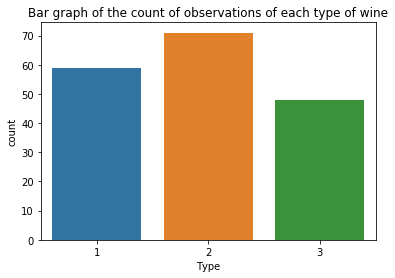

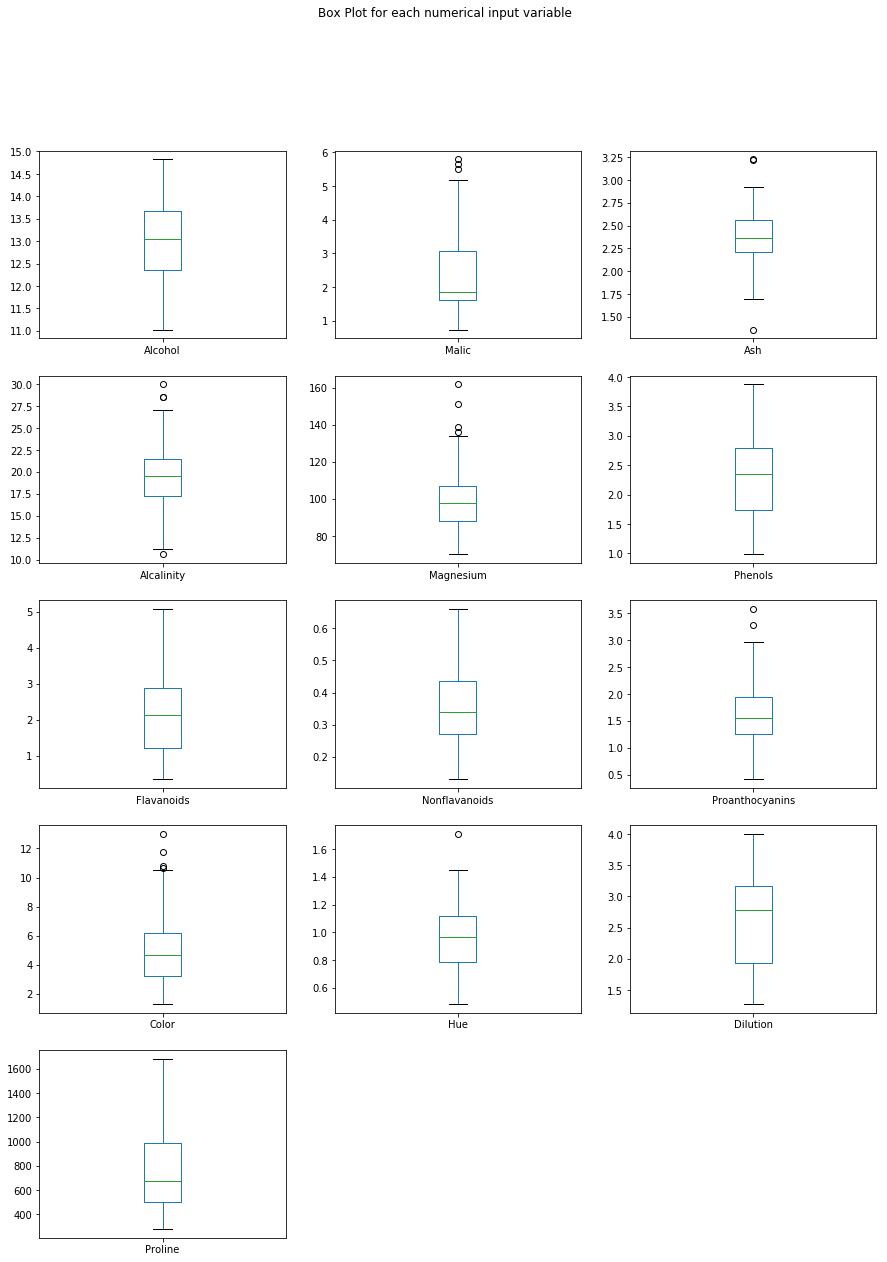

Text(0.5, 0.98, 'Scatter-matrix for Hue, Dilution, Proline')

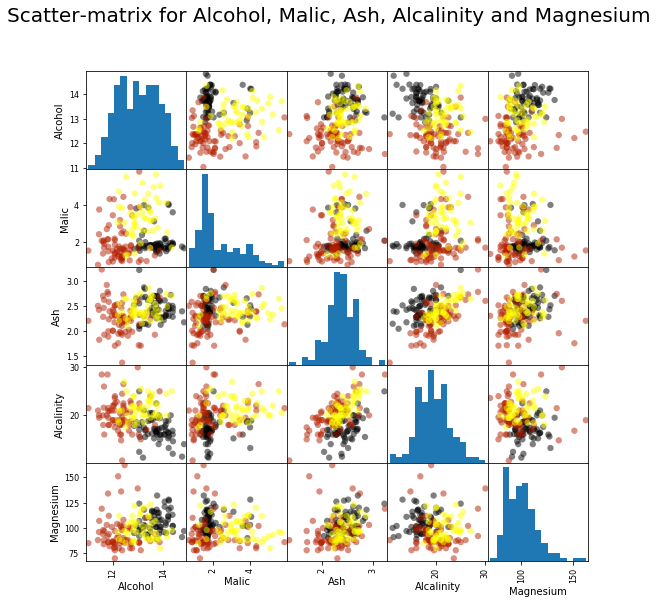

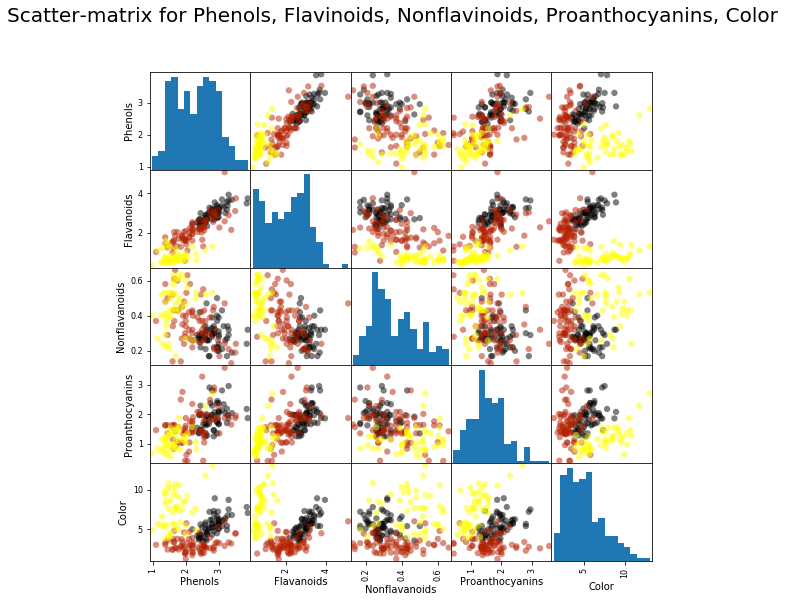

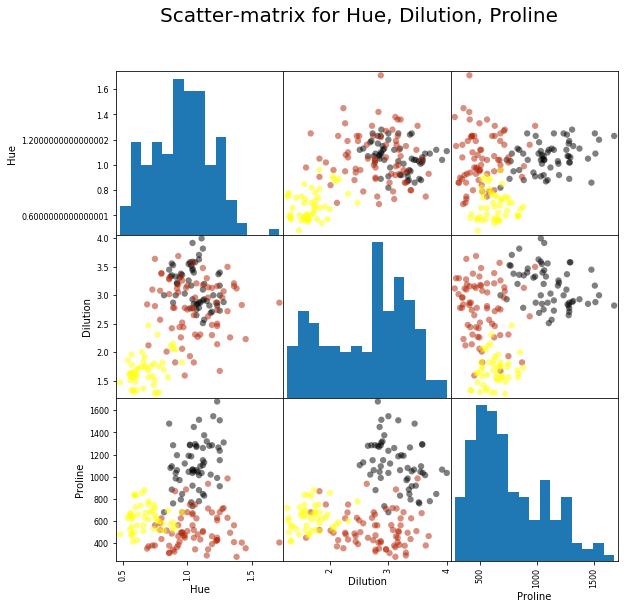

In [16]:
# (b) Plot the data to describe it

import seaborn as sns
import pylab as pl

# Bar plot showing the count of observations for each type of wine
sns.countplot(wine['Type'],label="Count")
plt.title("Bar graph of the count of observations of each type of wine", fontname="Times New Roman Bold")
plt.show()

# Boxplot to show distribution of features
wine.drop('Type', axis=1).plot(kind='box', subplots=True, layout = (5, 3), 
                               sharex=False, sharey=False, figsize=(15,20), 
                               title = 'Box Plot for each numerical input variable')
plt.show()

# Check if there is a correlation between features
from pandas.tools.plotting import scatter_matrix
from matplotlib import cm
feature_names1 = ['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium'] 
feature_names2 = ['Phenols', 'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color']
feature_names3 = ['Hue', 'Dilution', 'Proline']
X_1 = wine[feature_names1]
X_2 = wine[feature_names2]
X_3 = wine[feature_names3]
XX = wine[['Phenols', 'Flavanoids']]
y = wine['Type']
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_1, c = y, marker = 'o', s=40, 
                                     hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for Alcohol, Malic, Ash, Alcalinity and Magnesium', fontsize = 20)
scatter = pd.plotting.scatter_matrix(X_2, c = y, marker = 'o', s=40, 
                                     hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for Phenols, Flavinoids, Nonflavinoids, Proanthocyanins, Color', fontsize = 20)
scatter = pd.plotting.scatter_matrix(X_3, c = y, marker = 'o', s=40, 
                                     hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for Hue, Dilution, Proline', fontsize = 20)

**(c)**
My target variable will be the wine type. I am trying to predict the wine type (1, 2, or 3) based on the 13 chemical characteristics from the dataset. The data has already been cleaned and does not require any preprocessing. There are no missing values or erroneous data according to the data summary from part a. The features are approximately normally distributed. Additionally, the observations are split fairly evenly between each of the three types of wine.

**(d)** Since I am trying to assign a wine type to any given wine based on its chemical characteristics, I am conducting a classification algorithm. I will be using a KNN classification model to classify my wines as Type 1, Type 2 or Type 3. KNN is a good method to use because it does not make any underlying assumptions about the data. Even though my data is well distributed, KNN does not require it to be. 

**(e)** I will evaluate my code using the "accuracy" function in the KNN classifier from sklearn.neighbors. It makes sure that the set of labels predicted for a sample exactly matches the corresponding set of labels in y_true. I will also use cross validation to determine the best value for K. I want the model that outputs the lowest misclassification rate. 

In [17]:
# (f) divide data into training and test

# loading libraries
import numpy as np
from sklearn.model_selection import train_test_split

x = wine[['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 
          'Phenols', 'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 
          'Color', 'Hue', 'Dilution', 'Proline']]
y = wine['Type']

# print the shapes of X and y
# X is our features matrix with 178 x 13 dimension
print("x shape:", x.shape)
# y is our response vector with 178 x 1 dimension
print('y shape: ', y.shape)

#from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

# print the shapes of the new X objects
print("x train shape: ", x_train.shape)
print('x test shape: ', x_test.shape)

# print the shapes of the new y objects
print('y train shape: ', y_train.shape)
print('y test shape: ', y_test.shape)

x shape: (178, 13)
y shape:  (178,)
x train shape:  (142, 13)
x test shape:  (36, 13)
y train shape:  (142,)
y test shape:  (36,)


**(f)** I will be dividing the data into training data and testing data. The testing data will be 20% of the original data and the training data will be 80%. 
I will also perform cross validation so that I can train and test on all my data

When k = 1, the accuracy =  0.83333 this is the maximum accuracy amongst all tested k values


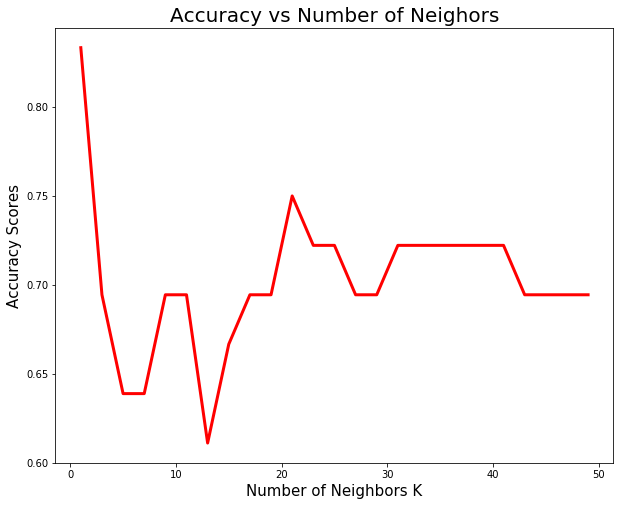

In [22]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.metrics import accuracy_score

MyList = []
for i in range(1, 50, 2):
    #print(i)
    MyList.append(i)
    pass

accuracy = []
for k in MyList:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    accuracy.append(accuracy_score(y_test, pred))
    #print(accuracy_score(y_test, pred))
    pass

print('When k = 1, the accuracy = ', round(max(accuracy), 5), 'this is the maximum accuracy amongst all tested k values')

# plot accuracy score error vs k
figure = plt.figure(figsize=(10,8))
plt.plot(MyList, accuracy, lw = 3, color = 'r')
plt.xlabel('Number of Neighbors K', size = 15)
plt.ylabel('Accuracy Scores', size = 15)
plt.title('Accuracy vs Number of Neighors', size = 20)
plt.show()

The optimal number of neighbors is 3


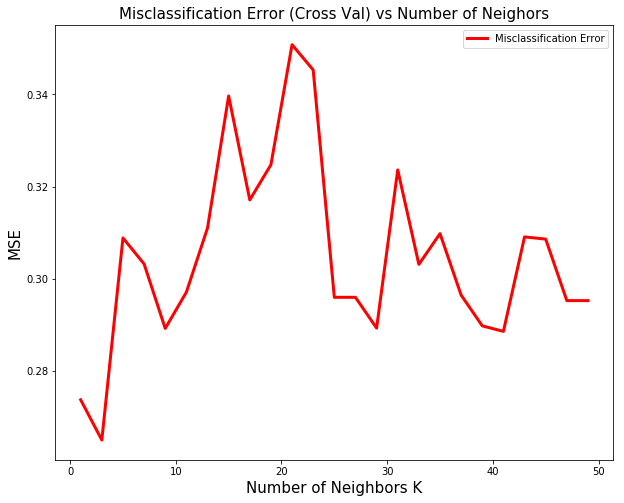

In [23]:
#Cross Validation

from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

MyList = []
for i in range(1, 50, 2):
    #print(i)
    MyList.append(i)
    pass

# empty list that will hold cross validation scores
cv_scores = []

# perform 10-fold cross validation
for k in MyList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    pass

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = MyList[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
figure = plt.figure(figsize=(10,8))
plt.plot(MyList, MSE, lw = 3, color = 'r', label = "Misclassification Error")
plt.xlabel('Number of Neighbors K', size = 15)
plt.ylabel('MSE', size = 15)
plt.title('Misclassification Error (Cross Val) vs Number of Neighors', size = 15)
plt.legend()
plt.show()

**(h)** 
When splitting the data into training and test data and cycling through various values of k, it became clear that k =1 provided the highest accuracy. However, a low k value leads to overfitting, high variance and low bias. The highest k value (k = 50) had an accuracy of approximately 0.7. This model would have a higher bias and lower variance. 
When using cross validation, k =3 provided the lowest misclassification error. When k = 50, the MSE was approximately 0.3. With a bigger dataset, perhaps, the accuracies and MSEs would fluctuate differently.  

**(i)
Question: Can you classify if a wine is type 1, 2 or 3 based on the given "wine" dataset?**
This data analysis uses K nearest neighbor to classify three different types of wines based on 13 different wine characteristics. Results show that a k-value of 3 provides the lowest misclassification rate when using cross validation, and k =1 provides the highest accuracy when breaking data into training/testing. This analysis is useful because if one is asked to classify a newly developed wine, then this model could determine, with an accuracy of approximately 83%, if it belongs to type 1, type 2 or type 3, assuming the some or all of the same properties are also provided. For future analysis, logistic regression could be used as an alternative method to determine wine types. Moreover, each property could be weighted different based on its contribution to determinging the wine type. 